In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from common_plotting import read_data
import seaborn as sns

In [2]:
thp_data, data = read_data(['k2000-lm399-log.csv', 'k2000-lm399-log-with-lm399-3.csv', 'k2000-x2-lm399-log.csv', 'k2000-x2-lm399-v+-log.csv', 'k2000-ad588-log.csv', 'k2000-x2-6031A-ad588-log-v+-v-.csv', 'k2000-x2-ad588-log.csv', 'k2000-x2-ad588-log-v+.csv', 'k2000-x2-ad588-log-v-.csv', 'k2000-x2-ad588-log-v-_to_v+.csv'])

In [32]:
lm399_plus_vin = data['k2000-x2-lm399-v+-log.csv']
lm399_plus_vin['rel_time'] = (lm399_plus_vin.index - lm399_plus_vin.index.min()) / pd.to_timedelta(1, unit='D')

In [33]:
lm399_plus_vin

lm399-1   lm399-2   lm399-4   lm399-6   lm399-7  \
datetime                                                                       
2018-04-02 19:11:23.162601  7.000822  7.011011  6.859831  6.853419  6.887259   
2018-04-02 19:45:31.906510  7.000824  7.011024  6.859841  6.853420  6.887268   
2018-04-02 20:19:39.083827  7.000829  7.011013  6.859834  6.853413  6.887255   
2018-04-02 20:53:46.346393  7.000813  7.011005  6.859824  6.853405  6.887247   
2018-04-02 21:27:53.622053  7.000823  7.011007  6.859829  6.853409  6.887251   
...                              ...       ...       ...       ...       ...   
2021-04-04 15:33:08.300359  7.001427  6.996841  6.843001  6.837550  6.870848   
2021-04-04 16:06:21.919520  7.001050  6.996898  6.843145  6.837625  6.870915   
2021-04-04 16:39:35.581511  7.001016  6.996916  6.843113  6.837557  6.870770   
2021-04-04 17:12:49.471671  7.001282  6.996764  6.843141  6.837539  6.870836   
2021-04-04 17:46:03.381365  7.001194  6.996867  6.843039  6.837569  6.870761   

                             lm399-8   lm399-9  lm399-10  lm399-11  lm399-12  \
datetime                                                                       
2018-04-02 19:11:23.162601  6.863612  6.860497  6.948390  6.900042  6.870034   
2018-04-02 19:45:31.906510  6.863613  6.860495  6.948387  6.900044  6.870037   
2018-04-02 20:19:39.083827  6.863622  6.860511  6.948402  6.900059  6.870041   
2018-04-02 20:53:46.346393  6.863631  6.860512  6.948409  6.900050  6.870045   
2018-04-02 21:27:53.622053  6.863626  6.860506  6.948403  6.900048  6.870041   
...                              ...       ...       ...       ...       ...   
2021-04-04 15:33:08.300359  6.864520  6.857535  6.949530  6.916181  6.871662   
2021-04-04 16:06:21.919520  6.864523  6.861685  6.949540  6.916182  6.871677   
2021-04-04 16:39:35.581511  6.864528  6.873496  6.949542  6.916196  6.871670   
2021-04-04 17:12:49.471671  6.864531  6.847750  6.949544  6.916231  6.871691   
2021-04-04 17:46:03.381365  6.864525  6.861803  6.949545  6.916227  6.871676   

                                   v+  temperature     pressure   humidity  \
datetime                                                                     
2018-04-02 19:11:23.162601  12.063171    31.855348   998.900027  24.045249   
2018-04-02 19:45:31.906510  12.063689    32.281164   998.853495  23.266054   
2018-04-02 20:19:39.083827  12.063844    32.453019   998.780948  22.865905   
2018-04-02 20:53:46.346393  12.063670    32.049161   998.962413  23.910862   
2018-04-02 21:27:53.622053  12.064219    32.329220   999.033246  24.484206   
...                               ...          ...          ...        ...   
2021-04-04 15:33:08.300359  11.732530    29.182031  1023.823662  19.351539   
2021-04-04 16:06:21.919520  11.732815    30.292383  1022.946981  18.624781   
2021-04-04 16:39:35.581511  11.732493    30.619727  1022.486034  18.608967   
2021-04-04 17:12:49.471671  11.732776    30.051172  1022.369449  19.875619   
2021-04-04 17:46:03.381365  11.732365    28.752344  1021.768022  21.221862   

                               rel_time  
datetime                                 
2018-04-02 19:11:23.162601     0.000000  
2018-04-02 19:45:31.906510     0.023712  
2018-04-02 20:19:39.083827     0.047406  
2018-04-02 20:53:46.346393     0.071102  
2018-04-02 21:27:53.622053     0.094797  
...                                 ...  
2021-04-04 15:33:08.300359  1097.848439  
2021-04-04 16:06:21.919520  1097.871513  
2021-04-04 16:39:35.581511  1097.894588  
2021-04-04 17:12:49.471671  1097.917666  
2021-04-04 17:46:03.381365  1097.940743  

[9559 rows x 15 columns]

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


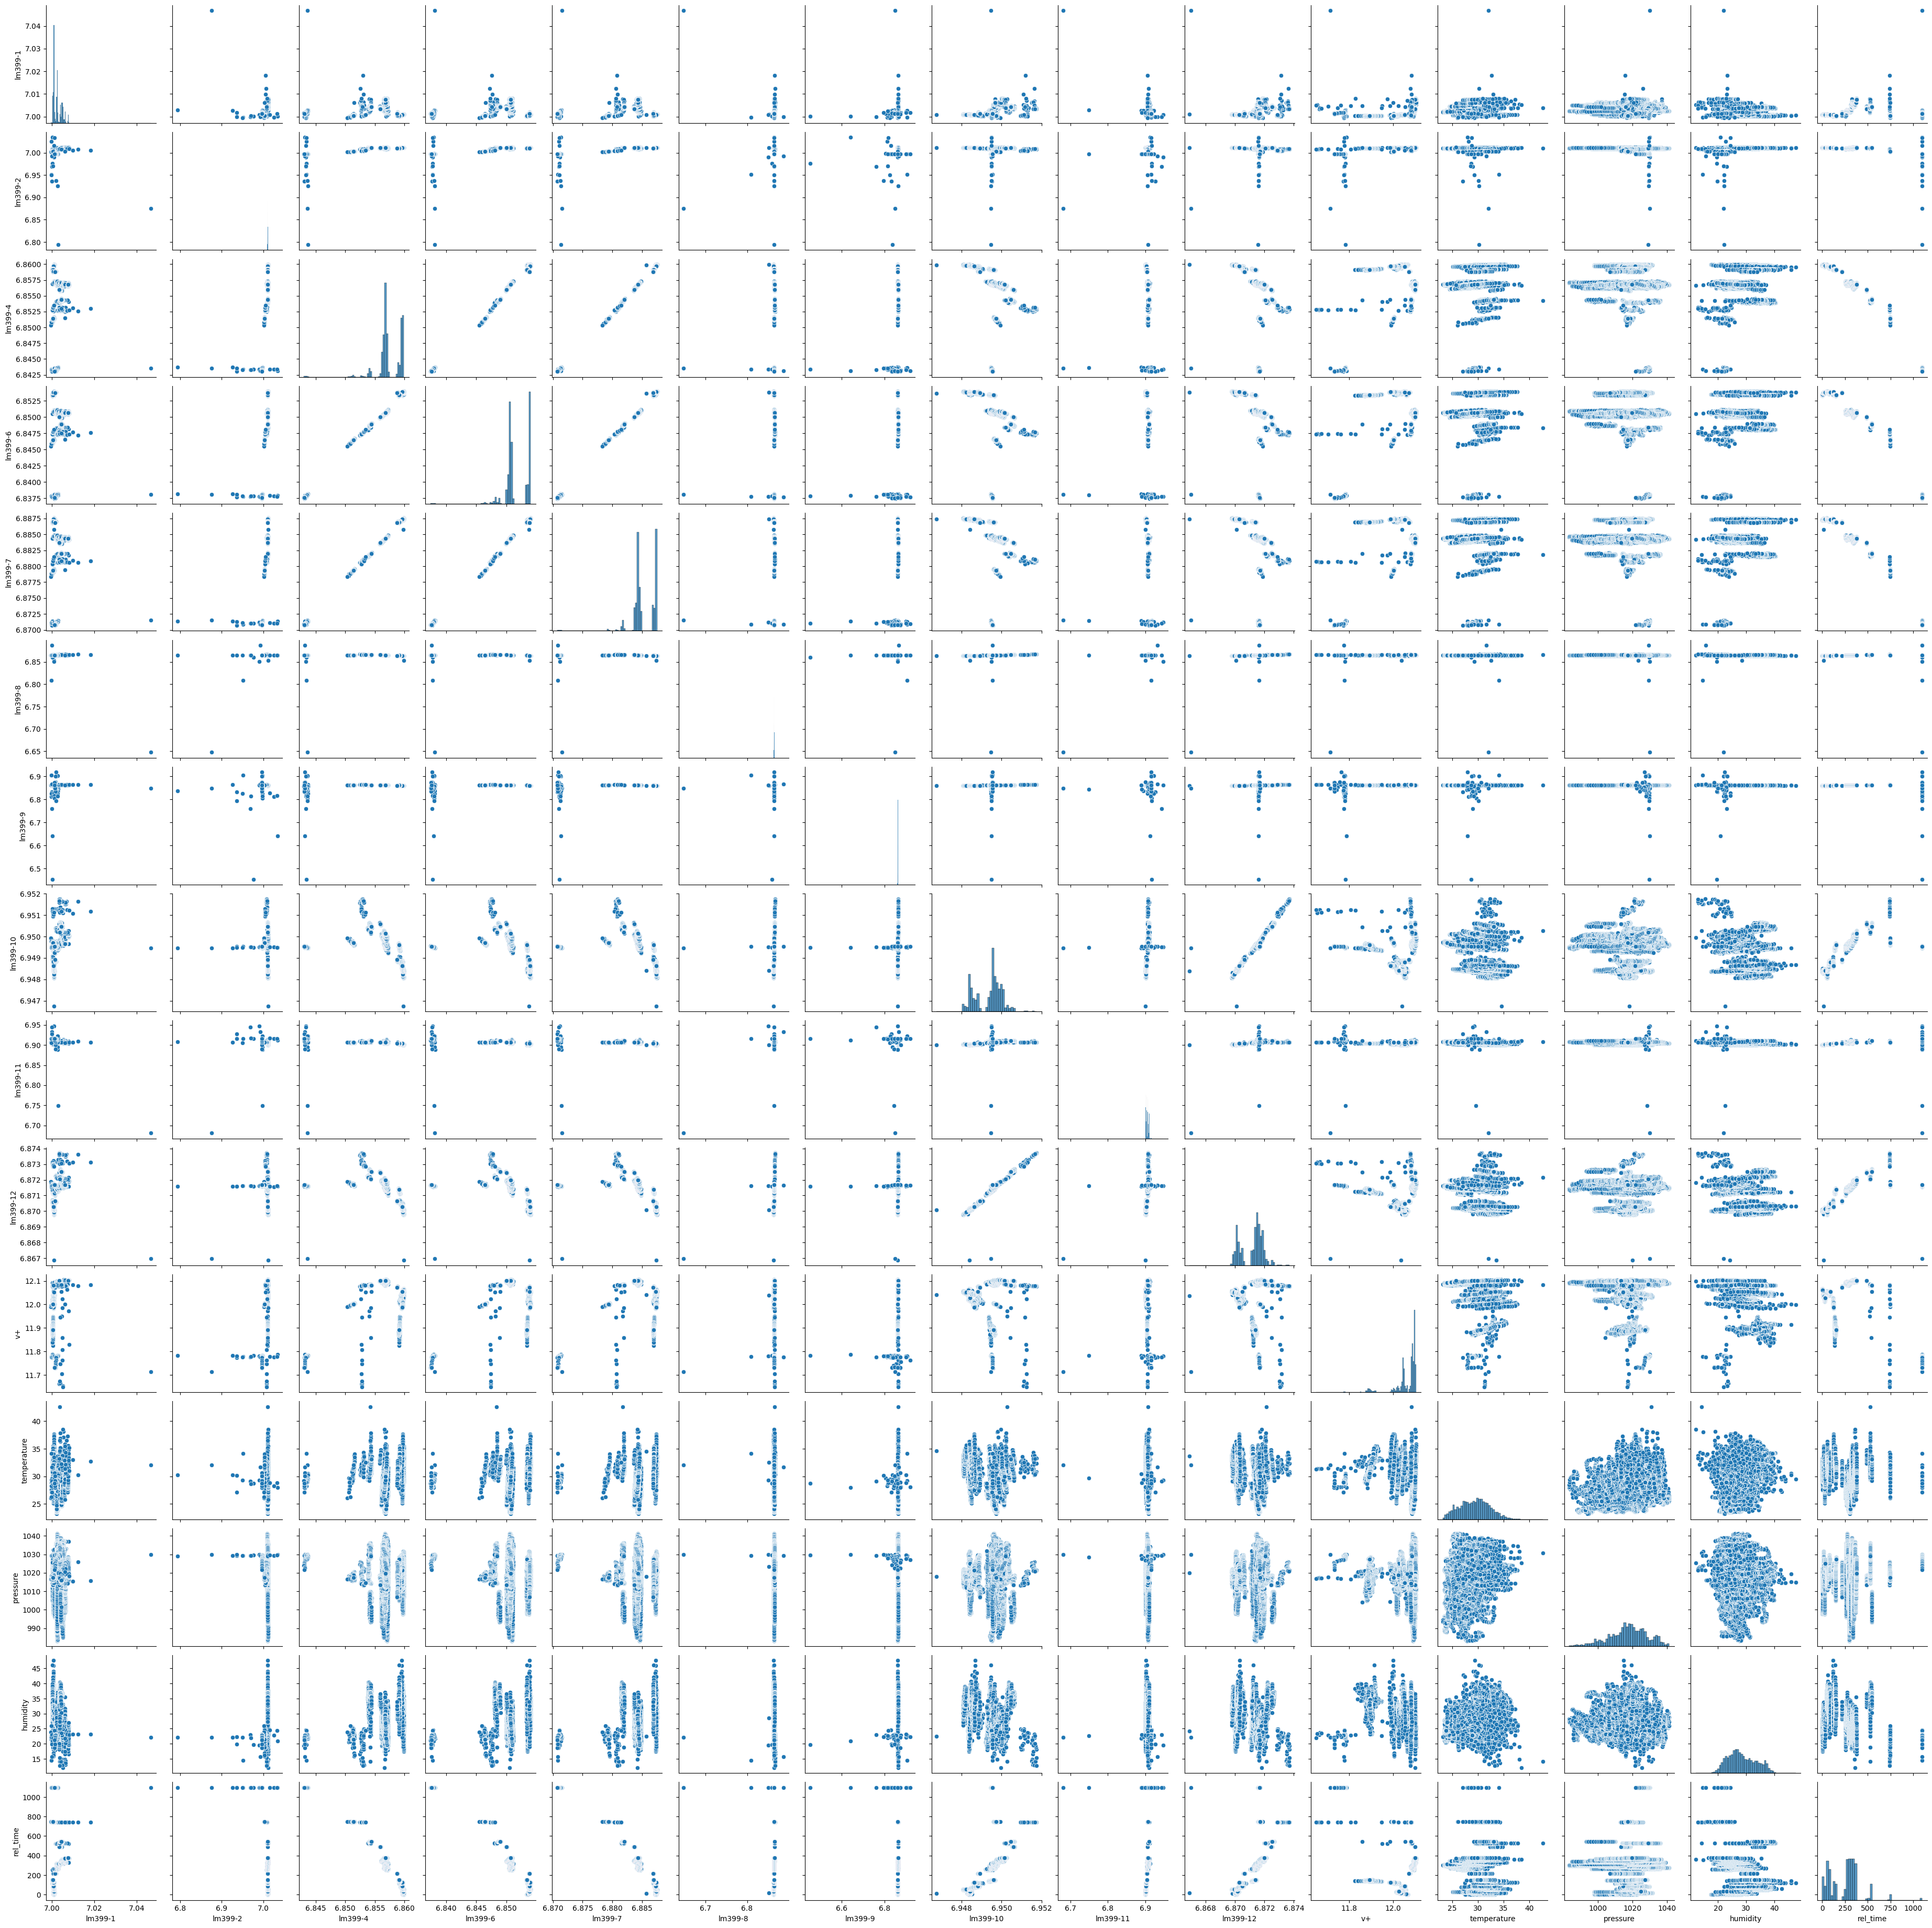

In [34]:

sns.pairplot(lm399_plus_vin)

In [31]:
train, test = train_test_split(lm399_plus_vin, test_size=0.3, shuffle=False)

for column in train.columns:
    if not column.startswith('lm399-'):
        continue

    regressor = LinearRegression()
    regressor.fit(train[['v+', 'temperature', 'pressure', 'humidity', 'rel_time']], train[column])

    predictions = regressor.predict(test[['v+', 'temperature', 'pressure', 'humidity', 'rel_time']])
    r2 = r2_score(test[column], predictions)
    rmse = np.sqrt(mean_squared_error(test[column], predictions))
    display(f'{column} R2: {r2:.3f} RMSE: {rmse:.3f} coefficients: v+= {regressor.coef_[0]:.3e} temperature= {regressor.coef_[1]:.3e} pressure= {regressor.coef_[2]:.3e} humidity= {regressor.coef_[3]:.3e} time= {regressor.coef_[4]:.3e}')
    display(f'{column} std v+={(lm399_plus_vin["v+"].std()*regressor.coef_[0])/regressor.intercept_*1e6:.0f} uV/V temperature={(lm399_plus_vin["temperature"].std()*regressor.coef_[1]/regressor.intercept_*1e6):.0f} uV/V pressure={(lm399_plus_vin["pressure"].std()*regressor.coef_[2]/regressor.intercept_*1e6):.0f} uV/V humidity={(lm399_plus_vin["humidity"].std()*regressor.coef_[3]/regressor.intercept_*1e6):.0f} uV/V time={(lm399_plus_vin["rel_time"].std()*regressor.coef_[4]/regressor.intercept_*1e6):.0f} uV/V')

'lm399-1 R2: -1.451 RMSE: 0.003 coefficients: v+= 6.239e-03 temperature= 3.972e-05 pressure= 1.045e-05 humidity= -3.797e-05 time= 5.633e-06'

'lm399-1 std v+=52 uV/V temperature=16 uV/V pressure=17 uV/V humidity=-27 uV/V time=134 uV/V'

'lm399-2 R2: 0.066 RMSE: 0.006 coefficients: v+= 3.341e-04 temperature= 4.077e-05 pressure= -6.967e-06 humidity= -5.259e-06 time= -3.821e-06'

'lm399-2 std v+=3 uV/V temperature=17 uV/V pressure=-11 uV/V humidity=-4 uV/V time=-90 uV/V'

'lm399-4 R2: 0.739 RMSE: 0.001 coefficients: v+= -2.025e-03 temperature= 8.435e-05 pressure= -5.159e-06 humidity= 9.983e-06 time= -9.358e-06'

'lm399-4 std v+=-17 uV/V temperature=35 uV/V pressure=-8 uV/V humidity=7 uV/V time=-224 uV/V'

'lm399-6 R2: 0.721 RMSE: 0.001 coefficients: v+= -3.192e-03 temperature= 1.020e-04 pressure= -5.049e-06 humidity= 2.671e-05 time= -9.140e-06'

'lm399-6 std v+=-27 uV/V temperature=42 uV/V pressure=-8 uV/V humidity=19 uV/V time=-219 uV/V'

'lm399-7 R2: 0.689 RMSE: 0.001 coefficients: v+= -3.065e-03 temperature= 8.913e-05 pressure= -5.185e-06 humidity= 1.624e-05 time= -8.980e-06'

'lm399-7 std v+=-25 uV/V temperature=37 uV/V pressure=-8 uV/V humidity=12 uV/V time=-214 uV/V'

'lm399-8 R2: -0.074 RMSE: 0.004 coefficients: v+= -3.597e-03 temperature= -3.671e-05 pressure= 3.042e-06 humidity= -3.321e-06 time= 4.368e-06'

'lm399-8 std v+=-30 uV/V temperature=-15 uV/V pressure=5 uV/V humidity=-2 uV/V time=104 uV/V'

'lm399-9 R2: -0.073 RMSE: 0.010 coefficients: v+= -2.261e-03 temperature= -6.052e-05 pressure= 3.356e-06 humidity= -3.624e-06 time= 7.053e-06'

'lm399-9 std v+=-19 uV/V temperature=-25 uV/V pressure=5 uV/V humidity=-3 uV/V time=169 uV/V'

'lm399-10 R2: -5.935 RMSE: 0.001 coefficients: v+= -3.998e-03 temperature= -3.662e-05 pressure= 3.050e-06 humidity= -3.861e-06 time= 4.602e-06'

'lm399-10 std v+=-33 uV/V temperature=-15 uV/V pressure=5 uV/V humidity=-3 uV/V time=108 uV/V'

'lm399-11 R2: -0.352 RMSE: 0.007 coefficients: v+= -5.199e-03 temperature= 1.321e-05 pressure= -4.460e-05 humidity= -3.264e-05 time= 2.128e-05'

'lm399-11 std v+=-43 uV/V temperature=5 uV/V pressure=-70 uV/V humidity=-23 uV/V time=500 uV/V'

'lm399-12 R2: -6.014 RMSE: 0.001 coefficients: v+= -4.162e-03 temperature= -4.188e-05 pressure= 3.106e-06 humidity= -5.336e-06 time= 5.292e-06'

'lm399-12 std v+=-35 uV/V temperature=-17 uV/V pressure=5 uV/V humidity=-4 uV/V time=126 uV/V'

In [20]:
np.std(lm399_plus_vin['v+'])

0.05754212392467858

In [22]:
0.05754212392467858 * 5e-3 * 1e6

287.7106196233929

In [75]:
x7000_data = pd.read_excel('../../confidential/TiN-LTZ1000-xans_psrr.xlsx', sheet_name='x7000_10dcv_3458abc_run3_k2400_', header=0, index_col=0, parse_dates=[0])
x7000_data.index = pd.to_datetime(x7000_data.index)
x7000_data['rel_time'] = (x7000_data.index - x7000_data.index.min()) / pd.to_timedelta(1, unit='s')
x7000_data = x7000_data[x7000_data['PSU voltage raw'] > 10.2]

In [76]:
x7000_data

3458A      3458B      3458C  PSU voltage raw  temp1  \
date                                                                           
2022-05-08 01:12:47  10.053436  10.053445  10.053445         10.20102   36.8   
2022-05-08 01:12:55  10.053436  10.053444  10.053445         10.20109   36.8   
2022-05-08 01:13:02  10.053436  10.053445  10.053445         10.20099   36.8   
2022-05-08 01:13:09  10.053435  10.053445  10.053445         10.20117   36.8   
2022-05-08 01:13:17  10.053435  10.053445  10.053445         10.20133   36.8   
...                        ...        ...        ...              ...    ...   
2022-06-08 07:42:23  10.053445  10.053451  10.053455         20.19983   37.6   
2022-06-08 07:42:31  10.053445  10.053451  10.053455         20.20013   37.6   
2022-06-08 07:42:38  10.053445  10.053451  10.053455         20.19971   37.6   
2022-06-08 07:42:46  10.053445  10.053451  10.053455         20.19988   37.6   
2022-06-08 07:42:53  10.053445  10.053451  10.053455         20.19962   37.6   

                     temp2  temp3  amb_temp  amb_rh  amb_pressure  dut_temp  \
date                                                                          
2022-05-08 01:12:47   37.3   36.2    24.978    42.0        1012.5    23.054   
2022-05-08 01:12:55   37.3   36.2    24.993    42.0        1012.6    23.054   
2022-05-08 01:13:02   37.3   36.2    24.988    42.0        1012.5    23.054   
2022-05-08 01:13:09   37.3   36.2    25.003    42.0        1012.5    23.054   
2022-05-08 01:13:17   37.3   36.2    25.003    42.0        1012.5    23.054   
...                    ...    ...       ...     ...           ...       ...   
2022-06-08 07:42:23   38.2   37.3    25.384    41.4        1017.6    23.054   
2022-06-08 07:42:31   38.2   37.3    25.379    41.4        1017.5    23.054   
2022-06-08 07:42:38   38.2   37.3    25.384    41.4        1017.6    23.054   
2022-06-08 07:42:46   38.2   37.3    25.379    41.4        1017.5    23.054   
2022-06-08 07:42:53   38.2   37.3    25.374    41.4        1017.5    23.055   

                     tec_curr      vbl4  x7000_out  deviation  \
date                                                            
2022-05-08 01:12:47    -0.465  10.20102  10.053442   0.026028   
2022-05-08 01:12:55    -0.463  10.20109  10.053442   0.007792   
2022-05-08 01:13:02    -0.465  10.20099  10.053442   0.017407   
2022-05-08 01:13:09    -0.467  10.20117  10.053442  -0.001824   
2022-05-08 01:13:17    -0.468  10.20133  10.053442   0.008123   
...                       ...       ...        ...        ...   
2022-06-08 07:42:23    -0.576  20.19983  10.053450   0.877808   
2022-06-08 07:42:31    -0.578  20.20013  10.053450   0.869187   
2022-06-08 07:42:38    -0.577  20.19971  10.053450   0.866535   
2022-06-08 07:42:46    -0.578  20.19988  10.053450   0.876813   
2022-06-08 07:42:53    -0.577  20.19962  10.053450   0.878803   

                     DC_supply_current   rel_time  
date                                               
2022-05-08 01:12:47           0.040045      530.0  
2022-05-08 01:12:55           0.040049      538.0  
2022-05-08 01:13:02           0.040052      545.0  
2022-05-08 01:13:09           0.040058      552.0  
2022-05-08 01:13:17           0.040062      560.0  
...                                ...        ...  
2022-06-08 07:42:23           0.033766  2702306.0  
2022-06-08 07:42:31           0.033765  2702314.0  
2022-06-08 07:42:38           0.033765  2702321.0  
2022-06-08 07:42:46           0.033761  2702329.0  
2022-06-08 07:42:53           0.033762  2702336.0  

[13046 rows x 17 columns]

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


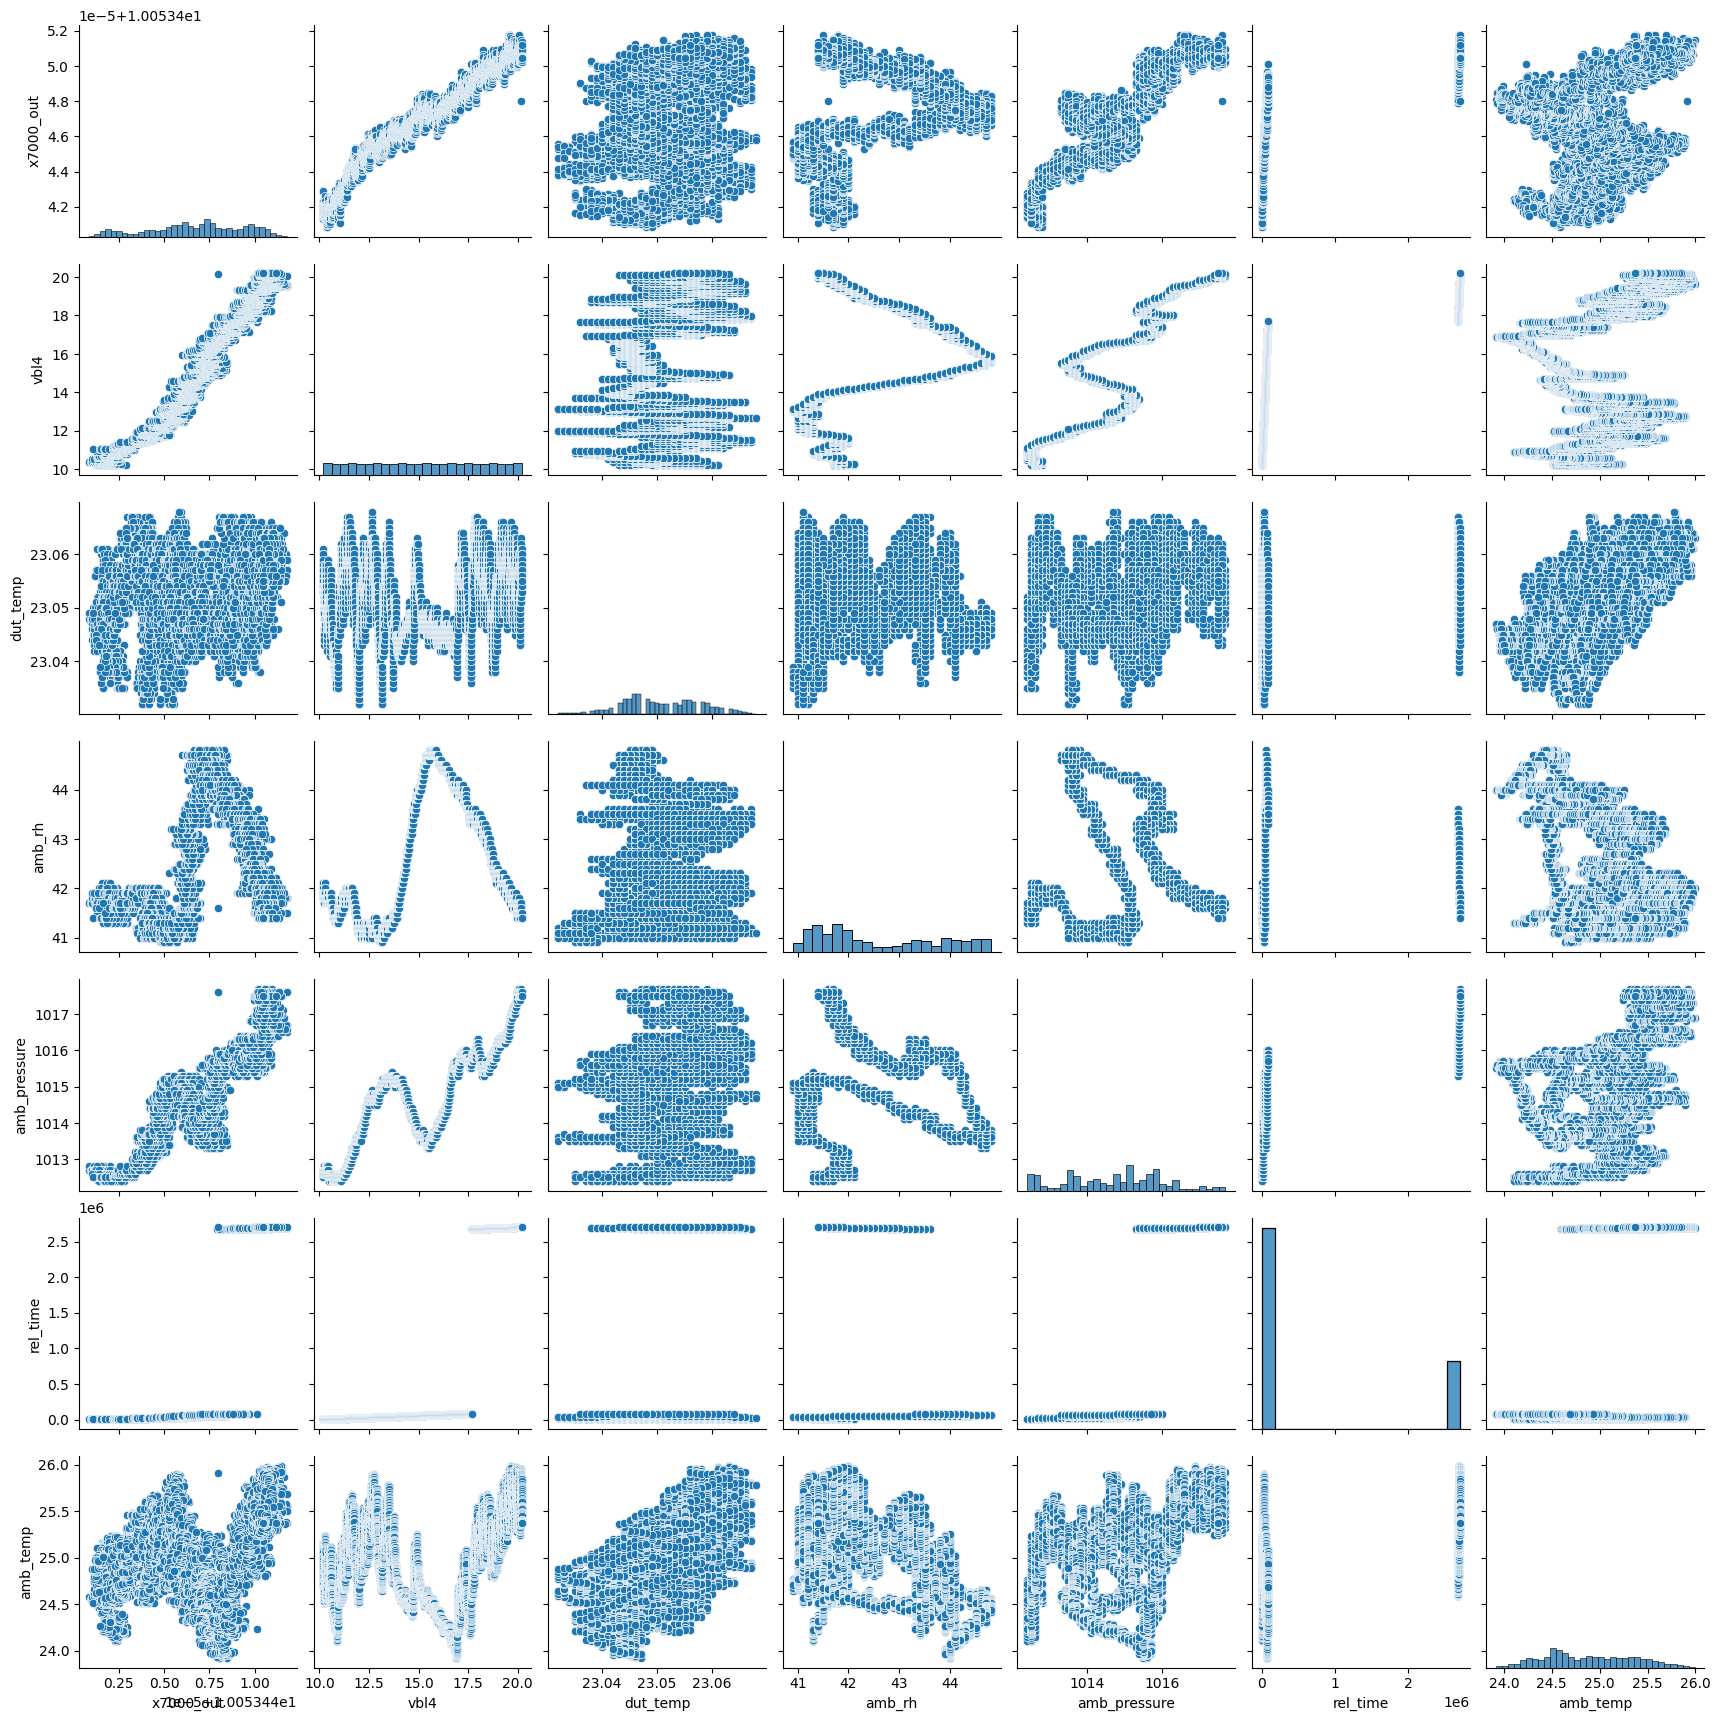

In [91]:
sns.pairplot(x7000_data, vars=['x7000_out', 'vbl4', 'dut_temp', 'amb_rh', 'amb_pressure', 'rel_time', 'amb_temp'])

'r2: 0.958 RMSE: 5.235e-07 intercept: 1.005e+01 coefficients: vbl4: 7.791e-07 amb_pressure: 2.180e-07'

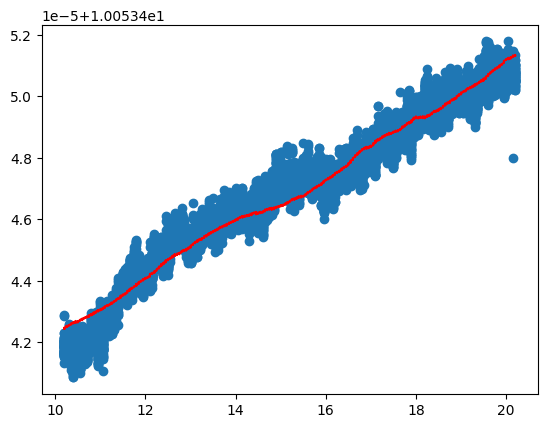

In [95]:
train, test = train_test_split(x7000_data, test_size=0.3, shuffle=False)
regressor = LinearRegression()
fit_columns = ['vbl4', 'dut_temp', 'amb_rh', 'amb_pressure', 'rel_time']
fit_columns = ['vbl4', 'amb_pressure']
# fit_columns = ['PSU voltage raw']
regressor.fit(x7000_data[fit_columns], x7000_data['x7000_out'])
r2 = r2_score(x7000_data['x7000_out'], regressor.predict(x7000_data[fit_columns]))
rmse = np.sqrt(mean_squared_error(x7000_data['x7000_out'], regressor.predict(x7000_data[fit_columns])))
display(f'r2: {r2:.3f} RMSE: {rmse:.3e} intercept: {regressor.intercept_:.3e} coefficients: ' + ' '.join([f'{c}: {v:.3e}' for c, v in zip(fit_columns, regressor.coef_)]))
plt.scatter(x7000_data['PSU voltage raw'], x7000_data['x7000_out'])
plt.plot(x7000_data['PSU voltage raw'], regressor.predict(x7000_data[fit_columns]), color='red')